# The Titanic Dataset

## Step 1: Defining the Problem

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we will build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In terms of structure, the analysis performed will follow a classical data science framework, which consists in the following points:


1. Defining the Problem: summarizing what is the challenge we are facing and which we want to give a solution to.

2. Importing Libraries and Gathering the Data

3. Data Cleansing: also known as data wrangling, consists in turning "raw" (or uncleansed) data to clean data, by identifying and treating outliers, missing values, data formats, etc.

4. Exploratory and Statistical Analysis: descriptive and graphical statistical analysis will be performed in order to look at patterns, correlations and features profiling. This is a required step so that the correct hypothesis is selected to further deploy a data model.

5. Modelling Data: consist in implementing and training different algorithms to predict the required outcomes.

6. Fine-tuning the Model(s): in this section, the models deployed earlier are tested using a testing dataset. It's the place, for instance, to determine if our model is overfitted or underfitted.

7. Validation and Final Conclusions


## Step 2: Importing Libraries & Gathering the Data

We are given two different datasets: train & test. The train dataset, the one to be used to perform the different data analysis and train the model, is given at: https://www.kaggle.com/competitions/titanic/data

In [2]:
#Importing required libraries and modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Importing required data: Train & test data
df_train=pd.read_csv("/Users/joelbullich/Desktop/Titanic Challenge/data/train.csv")
df_test=pd.read_csv("/Users/joelbullich/Desktop/Titanic Challenge/data/test.csv")

## Step 3: Data Cleansing

### Identifying the Variables

In [4]:
print("TRAIN DATA\n")
df_train.info()
print("_"*30)
print("\nTEST DATA\n")
df_test.info()

TRAIN DATA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
______________________________

TEST DATA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  


The variables contained in our dataset are:

*Dependent Variable*

- **Survived**: binary dependent variable with 2 different outcomes: "1" for those passengers that survived and "0" for those who did not
All other variables are potential predictor or independent variables. It's important to note, more predictor variables do not make a better model, but the right variables

*Independent Variables*

- **PassengerID** | **Ticket ID**:  are considered unique identifiers that should not have any impact to the dependent variable (therefore, to be excluded)

- **Pclass**: it is an ordinal number that describes the ticket class, which represents the socio-economic status of each passenger. Values vary between 1=Upper Class, 2=Middle Class" and 3="Lower Class"

- **Name**: represents the passenger name

- **Sex** | **Embarked**: to be converted to dummy variables

- **Age** | **Fare**:  continuous quantitative variable datatypes.

- **SibSp**: represents number of related siblings/spouse aboard

- **Parch**: represents number of related parents/children aboard. 
This one and SibSp could be used to create an extra column to identify if a passenger travels alone or not.

- **Cabin**: variable that identifies which cabin was assigned to each passenger/ticket. Lots of Null values.

In [5]:
#Using sample() will help us see what a dataset line looks like
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,NaN,S
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S


In [6]:
print("Numerical Features: ")
df_train.describe()

Numerical Features: 


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As part of the early insight analysis, we will take a look at how representative is the training dataset to the actual problem domain. 

- There are 891 samples in the dataset

- Survived is a categorical feature that needs to be treated as categorical, due to the fact that it varies between 0 ="not survived" and 1 ="survived"

  - 38% of the passengers in this sample survived, which is close to the real 32% survival rate of the Titanic 

- Aboard passengers were quite young: 29 years old, on average. Being 80 years old the oldest one(s)

- More than 75% of the passengers did not travel with either spouses or siblings aboard

- Although we note there are some potential outliers in e.g. "age" and "fare" columns, they still seem quite reasonable. For this reason, we will still keep them and wait until we do the statistical EDA to see if we correct them or leave them as they are

In [7]:
print("Categorical Features: ")
df_train.describe(include="O")

Categorical Features: 


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


- There is no name repeated within the dataset

- Almost 65% of the passengers were males (577 males/891 total)

- Most passengers (ca. 72%) embarked in a port (Embarked="S")

- There are multiple duplicated values of "tickets" and cabins, meaning that these might be shared among different passengers

### Dealing with missing values

In [8]:
#Checking missing values 
print("Columns with missing values in TRAIN dataset: ")
print(df_train.isnull().sum())
print("_"*30)
print("Columns with missing values in TEST dataset: ")
df_test.isnull().sum()

Columns with missing values in TRAIN dataset: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
______________________________
Columns with missing values in TEST dataset: 


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Some missing values appear in both datasets for columns "Age", "Cabin", "Fare" and "Embarked". These values need to be fixed, specially because some algorithms we will use later on do not accept them as inputs. There are two ways to fix them: either delete the entire row where these are located, or replacing them with a reasonable value. Common rule followed is that missing values are populated if possible. However, if most of the values in a column are Null, it could be reasonable to delete that column. If we choose to input a numerical value to a missing one, it's better to use the median as it will affect the least to the final output.

Based on above explanation, here are the actions we will take to treat the missing values:

- **AGE**: will be populated by the median age. This feature might be closely related to the final survival rate, so it makes sense to try to have it completed

- **EMBARKED**: will be populated by the mode. What's more, just 2 missing values out of 891 in the training dataset.

- **CABIN**: it will be excluded from the analysis (dropeed) due to the high amount of missing values in both datasets.

- **FARE**: we will input the median as well.


Even so, there are some columns that we might want to remove from the analysis

- **TICKET**: contains lots of duplicated values (22%), which might confuse our model. It seems to be a random number assigned to each passenger and might not have anything to do with the survival rate. PCLASS might have some sort of relationship, though. 

- **PASSENGERID**: this is the unique identifier for each passenger. Although it identifies which passenger survives or not, it has nothing to do for predicting the final outcome/survival 

In [9]:
datasets=[df_train,df_test]

In [10]:
for dataset in datasets:
    dataset["Age"].fillna(dataset["Age"].median(),inplace=True)
    dataset["Fare"].fillna(dataset["Fare"].median(),inplace=True)
    dataset["Embarked"].fillna(dataset["Embarked"].mode()[0],inplace=True)

columns_to_drop=["Cabin","Ticket","PassengerId"]
for dataset in datasets:
    dataset.drop(columns=columns_to_drop,axis=1,inplace=True)

print("Columns with missing values in TRAIN dataset: ")
print(df_train.isnull().sum())
print("_"*30)
print("Columns with missing values in TEST dataset: ")
print(df_test.isnull().sum())

Columns with missing values in TRAIN dataset: 
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
______________________________
Columns with missing values in TEST dataset: 
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


/var/folders/_p/0_rjv0d5595870_wg4hcb6vm0000gn/T/ipykernel_54936/808352749.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Age"].fillna(dataset["Age"].median(),inplace=True)
/var/folders/_p/0_rjv0d5595870_wg4hcb6vm0000gn/T/ipykernel_54936/808352749.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

## Step 4: Exploratory and Statistical Analysis

### Feature Engineering

Now that we have sorted out the missing values, we are going to "feature engineer" our data to create extra columns to deal with other passengers' characteristics. When feature engineering, the goal should remain the same, that is identifying which columns (or combination fo columns) affect the most when predicting each passenger's outcome of either surviving or not surviving.

We also need to take into account that any change performed in the training dataset (such as adding extra columns), will need to be replicated in the test dataset as well. We must keep consistency within both datasets.

The 'Name' column, as seen above, consists in a series of words that seem to follow this order: 'surname' + ',' + 'title' + 'Name 1' +...+'Name N'

In [11]:
df_train['Name'].sample(5)

649    Stanley, Miss. Amy Zillah Elsie
379        Gustafsson, Mr. Karl Gideon
419          Van Impe, Miss. Catharina
280                   Duane, Mr. Frank
683        Goodwin, Mr. Charles Edward
Name: Name, dtype: object

In [12]:
#Extracting the Titles of each value in 'Name' columns
#In the form of " ,Title."

for dataset in datasets:
    #by creating an extra column calles 'Title'
    #using regular expression:,\s* -->looking for comas followed by a space |([^\.]+) --> looking for any text that is not a point | 
    # \. --> looking for the point that 'closes' the title
    dataset['Title']=dataset['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)

In [13]:
df_train[['Title','Sex']].value_counts()

Title         Sex   
Mr            male      517
Miss          female    182
Mrs           female    125
Master        male       40
Rev           male        6
Dr            male        6
Major         male        2
Col           male        2
Mlle          female      2
Sir           male        1
Ms            female      1
Capt          male        1
Mme           female      1
Lady          female      1
Jonkheer      male        1
Dr            female      1
Don           male        1
the Countess  female      1
Name: count, dtype: int64

In [14]:
#classify them in 5 different categories and replace in the column
titles=['Mr','Miss','Mrs','Master']

#create a function that will return for each row its name titles 

def transform_title(x):
    if x in titles:
        return x
    else:
        return 'Others'

for dataset in datasets:
    dataset['Title']=dataset['Title'].apply(transform_title)


In [15]:
for dataset in datasets:
    print(dataset['Title'].value_counts())

Title
Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: count, dtype: int64
Title
Mr        240
Miss       78
Mrs        72
Master     21
Others      7
Name: count, dtype: int64


As both columns 'SibSp' and 'Parch' indicate whether a passenger is travelling alone or note, we might want to work with a new feature based on these two columns to obtain the total number of each passenger's family members on board. 

Therefore, we will calculate family size by adding both values + 1, due to the fact that a passenger that is travelling alone is part of a 1-member family.

In [16]:
for dataset in datasets:
    dataset['FamSize']=dataset['SibSp']+dataset['Parch']+1

What's more, we can even classify whether a passenger is travelling alone and create an extra column called 'TravAlone' to see if travelling alone has a big influence in predicting the survival of a passenger.

In [17]:
for dataset in datasets:
    dataset['TravAlone']=0 #first assumption: passengers do not travel alone
    dataset.loc[dataset['FamSize']==1, 'TravAlone']=1 #we change the values conditionally to 1 if the passenger is not travelling alone

We still have a couple of columns that we could refine a bit more for better analysis. First, the Age column contains 88 different values, which makes it hard to try to summarize it in order to extract some conclusions. When dealing with large ranges of values that are representative of something, it can be interesting to group it and try to categorise for the sake of creating more features that describe each passenger.

The idea, in this case, consists in grouping or "binning" the different passenger ages into 'bins' or age ranges that can describe a passenger.

In [18]:
#we will adapt the format of Age so that it is treated as an integer
for dataset in datasets:
    dataset['Age']=dataset['Age'].astype(int)

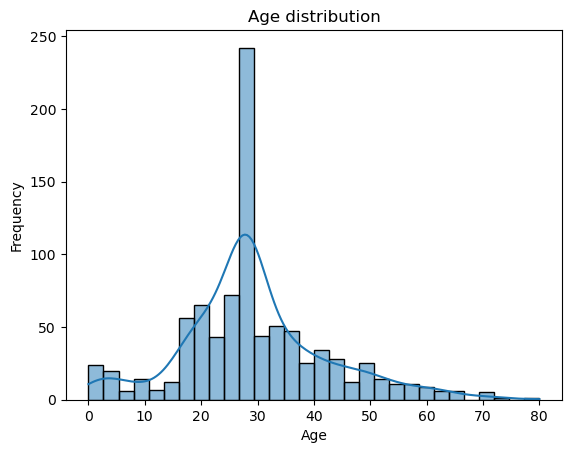

In [19]:
#take a look at how 'Age' is distributed

sns.histplot(df_train['Age'],kde=True, bins=30)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [20]:
print(df_train['Age'].value_counts().sort_values(ascending=False))

print("Max Value: ", df_train['Age'].max())
print("Min Value: ",df_train['Age'].min())

Age
28    204
24     31
22     27
30     27
18     26
     ... 
12      1
66      1
53      1
80      1
74      1
Name: count, Length: 71, dtype: int64
Max Value:  80
Min Value:  0


We observe that we have lots of instances (or passengers) aged 28 year. However, we have to recall that 28 is the median age value in this dataset, which was the value used when filling the missing values. Taken into account this consideration, we know the reason why the data is skewed towards this value. Nevertherless, the strategy to use when binning age values will be taking broad groups (following socially accepted age groups - see below) so that the 28s are "absorbed" naturally and the distortion is smooth out.

In [ ]:
#Binning Column Age

for dataset in datasets:
    dataset.loc[dataset['Age'] <= 12,'Age'] = 0 #Childs
    dataset.loc[(dataset['Age']>12) & (dataset['Age']<=19), 'Age'] = 1 #Teenagers
    dataset.loc[(dataset['Age']>19) & (dataset['Age']<=35), 'Age'] = 2 #Young Adults
    dataset.loc[(dataset['Age']>35) & (dataset['Age'] <= 55), 'Age'] = 3 #Adults
    dataset.loc[dataset['Age']>55, 'Age'] = 4 #Seniors

The Fare column represents the value or price each passenger paid for travelling in the Titanic (we assume it is in british pounds as at the time (1912) this was the common currency in the UK). 

In [ ]:
#Obviously, higher class passengers are paying more (on average) for their tickets

df_train.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154630
2    20.662174
3    13.675866
Name: Fare, dtype: float64

In [ ]:
#let's round the column to 2 decimals (ticket prices are rounded to 2 decimals as well)

for dataset in datasets:
    dataset['Fare']=dataset['Fare'].round(decimals=2)

Following this logic, and due to the fact that is highly correlated with the Pclass, we may want to bin the travel fares into 3 different categories: low, medium, and high. We will check, visually, the distribution to adjust the bins accordingly.

In [ ]:
print("Max Fare: ", df_train.Fare.max())
print("Min Fare: ",df_train.Fare.min())

Frequency of Passengers on each Class:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Max Fare:  512.33
Min Fare:  0.0


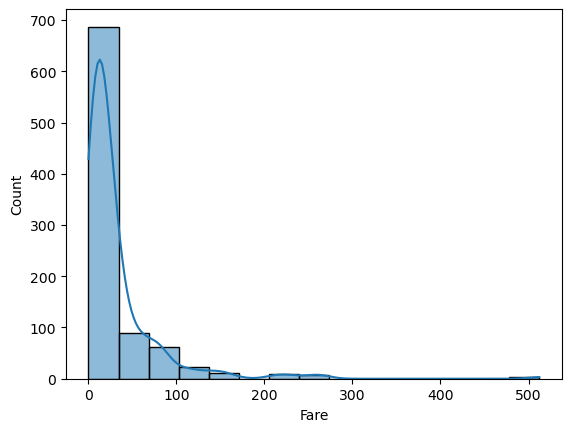

In [ ]:
#Visually we can observe that most of the tickets had a significant low value

sns.histplot(df_train['Fare'],bins=15,kde=True)
plt.show()

In [54]:
bins=[0,15,50,600] #defining the fare ranges
labels=[3,2,1] #like Class - 3rd (Low), 2nd (medium), 1st Fare (High)

for dataset in datasets:
    dataset['Fare'] = pd.cut(dataset['Fare'],bins=bins, labels=labels)

In [ ]:
#Logically, after binning, the distribution has been maintained respecing the PClass
print("Frequency of Passengers on each Class:\n", df_train.Pclass.value_counts())
print("Frequency of Travel Fares ", df_train.Fare.value_counts())


Frequency of Passengers on each Class:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Frequency of Travel Fares  Fare
3    443
2    273
1    160
Name: count, dtype: int64


In [23]:
women=df_train.loc[df_train.Sex=='female']['Survived']

In [24]:
rate_women=sum(women)/len(women)
rate_women

0.7420382165605095

## Step 5: Modelling Data

## Step 6: Fine-Tuning the Model(s)

## Step 7: Validation and Final Conclusions